In [1]:
df = pd.read_pickle('./data/experiment_results_v5.pcl')

In [30]:
cont = df.loc[df.decade == 0] # extract the control simulations
LP = df.loc[(df.track=='PGW_LP') & (df.name == 'FLC_LP_FT')] # grab the less precip and more
MP = df.loc[(df.track=='PGW_MP') & (df.name == 'FLC_MP_FT')] # precip 

# Summarize by year
#cont = cont.groupby('year').sum()
#LP = LP.groupby('year').sum()
#MP = MP.groupby('year').sum()

In [71]:
# compute annual totals:

def compute_annual_vals(df,var=[]):
    '''
    Inputs:
    df = data frame
    var = string name of variable to summarize by year
    
    Outputs:
    array of annual sums
    '''
    strt = '1993-10-1'
    nd = '2013-9-30'
    
    dates = pd.date_range(strt,nd)
    
    dat = pd.DataFrame()
    dat['value'] = df[var].as_matrix()[0]
    dat.index = pd.DatetimeIndex(dates)
    
    # compute water year
    dat['wateryear'] = dat.index.map(rut.wateryear)
    
    # summarize by water year
    return dat.groupby('wateryear').sum().value.as_matrix()

In [72]:
compute_annual_vals(MP.loc[(MP.year == 2050)&(MP.scenario == 1)],'streamflow')

array([ 180.25121132,  246.62257094,  204.84152927,  211.36292949,
        209.3062213 ,  231.68391981,  189.59399557,  198.98279126,
        163.49808071,  176.74325326,  224.31694482,  200.74494106,
        209.08125421,  320.83091521,  219.63594776,  216.11723976,
        234.19866342,  246.42378715,  265.16776611,  233.3065716 ])

In [108]:
def run_computation(df,var,ident):

    years = []
    scenarios = []
    vals = []
    indexs = []

    for year in df.year.unique():
        for index in df.loc[df.year==year].index.unique():
            years.append(year)
            indexs.append(index)
            
            vals.append(compute_annual_vals(df.loc[(df.year == year)&(df.index == index)],
                                            var))
    
    out = pd.DataFrame()
    out['year'] = years
    out['index'] = indexs
    out[var] = vals
    out['ID'] = ident
    
    return out

In [111]:
outs = []

for df,ident in zip([MP,LP,cont],['MP','LP','Cont']):
    outs.append(run_computation(df,'streamflow',ident))

In [112]:
out = pd.concat(outs)

In [115]:
out.loc[(out.year==2050) & (out.ID == 'MP')]

year  index                                         streamflow  ID
12  2050     38  [180.251211324, 246.622570938, 204.841529275, ...  MP
13  2050     49  [181.925120372, 250.586787086, 206.260468167, ...  MP
14  2050     60  [179.46185146, 249.601856849, 203.649598914, 2...  MP

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

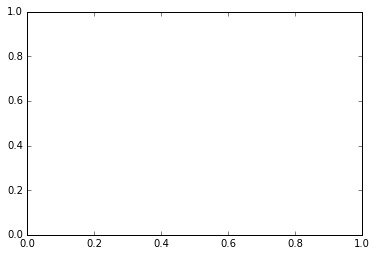

In [122]:
plt.hist(out.loc[out.ID == 'Cont'].streamflow.as_matrix(),bins=100)